<a href="https://colab.research.google.com/github/Delusional-bishop/Demand-Forecasting-for-Retail-Inventory-Optimization/blob/main/Demand_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20
1,2,17-01-2011,8091,216419,99.0375,99.0375,0,0,28
2,3,17-01-2011,8091,216425,133.9500,133.9500,0,0,19
3,4,17-01-2011,8091,216233,133.9500,133.9500,0,0,44
4,5,17-01-2011,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09-07-2013,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09-07-2013,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09-07-2013,9984,547934,141.7875,191.6625,0,1,12


In [ ]:

df[['day', 'month', 'year']] = df['week'].str.split('-', expand=True)

In [ ]:
df


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17-01-2011,8091,216418,99.0375,111.8625,0,0,20,17,01,2011
1,2,17-01-2011,8091,216419,99.0375,99.0375,0,0,28,17,01,2011
2,3,17-01-2011,8091,216425,133.9500,133.9500,0,0,19,17,01,2011
3,4,17-01-2011,8091,216233,133.9500,133.9500,0,0,44,17,01,2011
4,5,17-01-2011,8091,217390,141.0750,141.0750,0,0,52,17,01,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09-07-2013,9984,223245,235.8375,235.8375,0,0,38,09,07,2013
150146,212639,09-07-2013,9984,223153,235.8375,235.8375,0,0,30,09,07,2013
150147,212642,09-07-2013,9984,245338,357.6750,483.7875,1,1,31,09,07,2013
150148,212643,09-07-2013,9984,547934,141.7875,191.6625,0,1,12,09,07,2013


In [ ]:
df = df.drop('week', axis=1)

In [ ]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,2011
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,2011
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,2011
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,2011
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,2011
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,2013
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,2013
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,2013
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,2013


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.drop('units_sold', axis=1)
y = df['units_sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
model.score(X_test, y_test)

0.7761026044633617

In [ ]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)

27.104162078630694


In [ ]:
df['units_sold'].describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


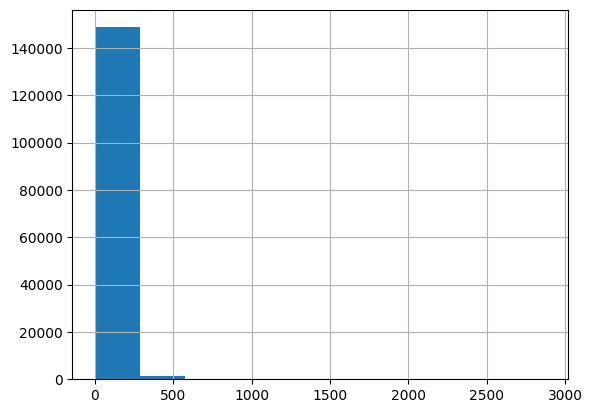

In [ ]:
df['units_sold'].hist()
plt.show()

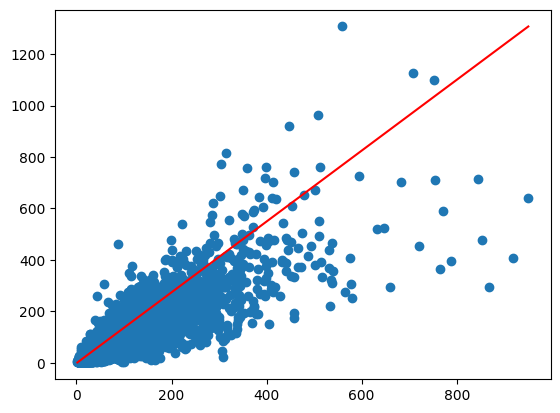

In [ ]:
plt.scatter(predictions, y_test)
plt.plot(np.linspace(predictions.min(), predictions.max()), np.linspace(y_test.min(), y_test.max()), color='red')
plt.show()

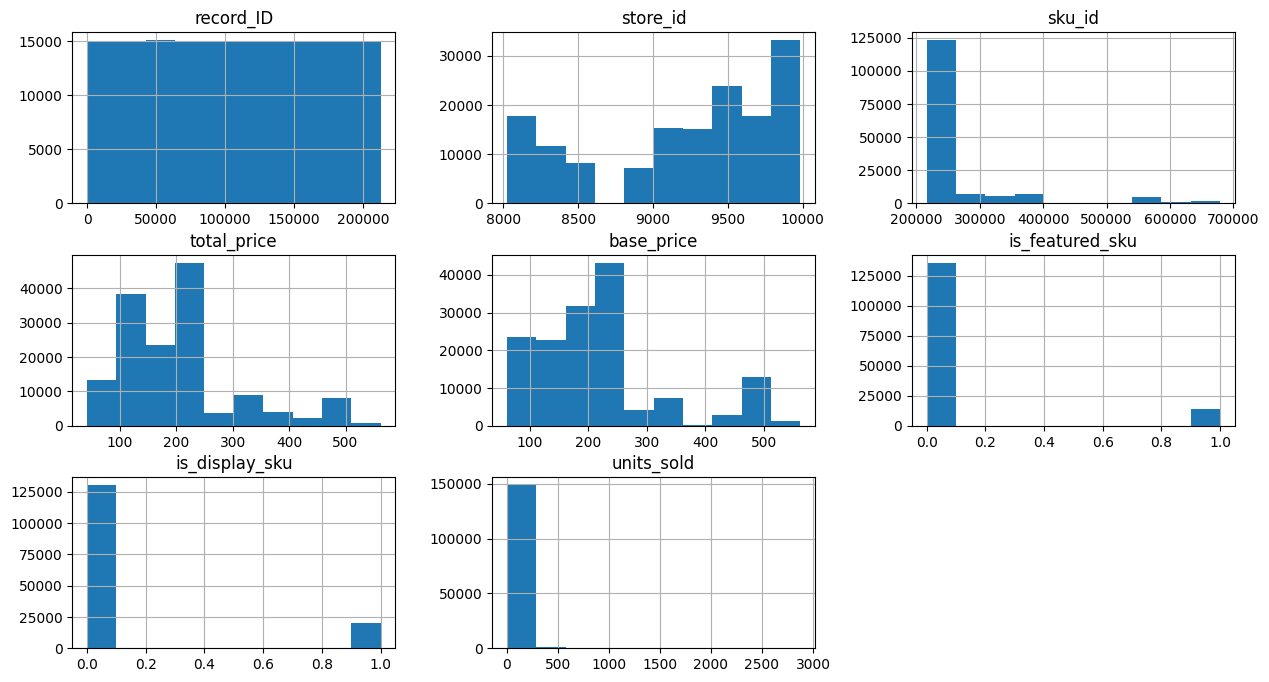

In [ ]:
df.hist(figsize=(15, 8))
plt.show()

In [ ]:
df = df.drop('record_ID', axis=1)

In [ ]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,2011
1,8091,216419,99.0375,99.0375,0,0,28,17,01,2011
2,8091,216425,133.9500,133.9500,0,0,19,17,01,2011
3,8091,216233,133.9500,133.9500,0,0,44,17,01,2011
4,8091,217390,141.0750,141.0750,0,0,52,17,01,2011
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,2013
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,2013
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,2013
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,2013


In [ ]:
len(df.store_id.unique())

76

In [ ]:
len(df.sku_id.unique())

28

In [ ]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]

In [ ]:
df


,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,2011
1,8091,216419,99.0375,99.0375,0,0,28,17,01,2011
2,8091,216425,133.9500,133.9500,0,0,19,17,01,2011
3,8091,216233,133.9500,133.9500,0,0,44,17,01,2011
4,8091,217390,141.0750,141.0750,0,0,52,17,01,2011
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,2013
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,2013
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,2013
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,2013


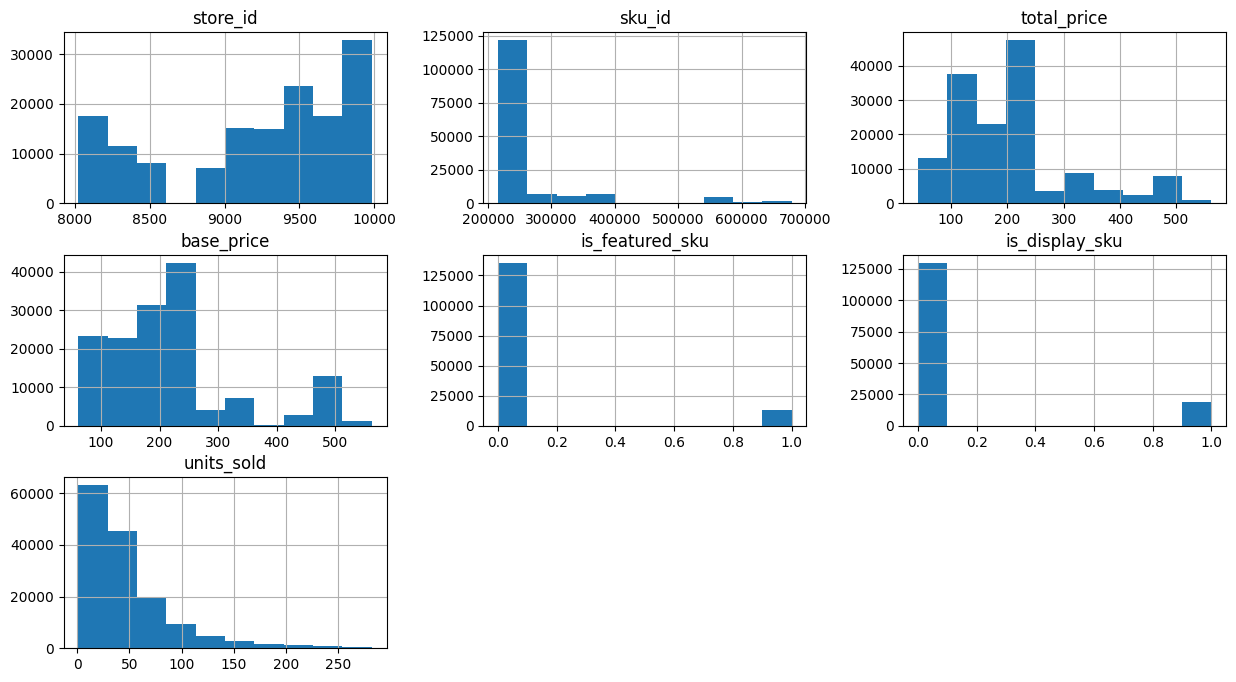

In [ ]:
df.hist(figsize=(15, 8))
plt.show()

<Axes: >

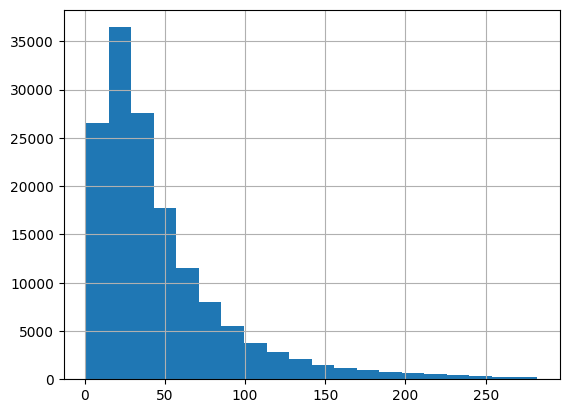

In [ ]:
df.units_sold.hist(bins = 20)

In [ ]:
df


,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,2011
1,8091,216419,99.0375,99.0375,0,0,28,17,01,2011
2,8091,216425,133.9500,133.9500,0,0,19,17,01,2011
3,8091,216233,133.9500,133.9500,0,0,44,17,01,2011
4,8091,217390,141.0750,141.0750,0,0,52,17,01,2011
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,2013
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,2013
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,2013
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,2013


In [ ]:
df = df.join(pd.get_dummies(df.store_id , prefix = 'store'))
df = df.join(pd.get_dummies(df.sku_id , prefix = 'item'))

In [ ]:
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,8091,216418,99.0375,111.8625,0,0,20,17,01,2011,...,False,False,False,False,False,False,False,False,False,False
1,8091,216419,99.0375,99.0375,0,0,28,17,01,2011,...,False,False,False,False,False,False,False,False,False,False
2,8091,216425,133.9500,133.9500,0,0,19,17,01,2011,...,False,False,False,False,False,False,False,False,False,False
3,8091,216233,133.9500,133.9500,0,0,44,17,01,2011,...,False,False,False,False,False,False,False,False,False,False
4,8091,217390,141.0750,141.0750,0,0,52,17,01,2011,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,2013,...,False,False,False,False,False,False,False,False,False,False
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,2013,...,False,False,False,False,False,False,False,False,False,False
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,2013,...,False,False,False,False,False,False,False,False,False,False
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,2013,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df = df.drop('store_id', axis = 1)

In [ ]:
df = df.drop('sku_id', axis = 1)

In [ ]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,2011,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,2013,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,2013,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,2013,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,2013,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
model = RandomForestRegressor(n_jobs=-1)

X ,y  = df.drop('units_sold', axis=1), df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
model.score(X_test, y_test)


0.825345625156485

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)
rmse

17.839321636801348

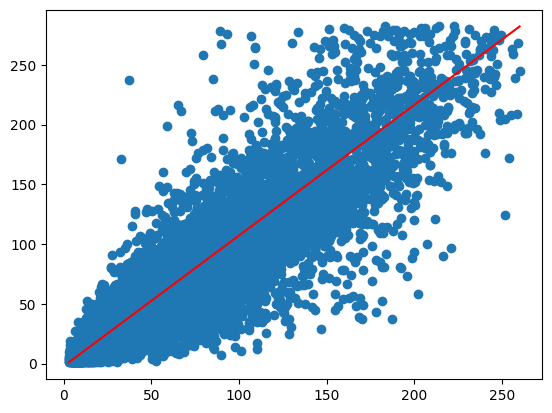

In [ ]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(), y_test.max()), color='red')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10 ,20],
    'min_samples_split': [2, 3],

}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model , param_grid , verbose = 2 , cv=3)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  13.2s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  12.4s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  12.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  24.9s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  24.8s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  25.0s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.2s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.4s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  24.2s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  24.3s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [ ]:
best_model.score(X_test, y_test)

0.8198892317243238